In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data=pd.read_csv('E://DS Projects//Spotify Song Prediction//dataset.csv')

In [4]:
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
data.shape

(114000, 21)

In [6]:
data.drop(data.columns[0], axis=1, inplace=True)

In [7]:
data.shape

(114000, 20)

In [8]:
data.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

##### Here our target variable is the popularity. Lets check its range.

In [10]:
data.popularity.min()

0

In [11]:
data.popularity.max()

100

#### Data Analysis
###### In EDA, we always compare with the dependent variable, here Popularity. So we see the relationships of different features with this variable.
1. Missing Values
2. Duplicate values
3. All the numerical variables
4. Distribution of the numerical variables: Check the skewness of the features.
5. Categorical variables
6. Cardinality of Categorical variables
7. Outliers
8. Relationship between independent and dependent features

##### Missing values

In [12]:
features_with_nan=[feature for feature in data.columns if data[feature].isna().sum()>0]

In [13]:
features_with_nan

['artists', 'album_name', 'track_name']

In [14]:
for feature in features_with_nan:
    print('Number of missing value in {}: {}'.format(feature,np.round(data[feature].isna().sum())))

Number of missing value in artists: 1
Number of missing value in album_name: 1
Number of missing value in track_name: 1


We see that the number of missing values is just 1 in each of the columns. So we can drop these nan values since the number is very less as compared to total number of entries.

In [15]:
 data=data.dropna()

In [16]:
data.isna().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

###### Dropping the duplicates

In [17]:
data=data.drop_duplicates()

In [18]:
data.shape

(113549, 20)

### Numerical features

In [19]:
feature_numerical=[feature for feature in data.columns if data[feature].dtype!='O']
print('Number of numerical columns=', len(feature_numerical))
data[feature_numerical].head()

Number of numerical columns= 15


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


##### Selecting out the discrete features among the numerical features and finding their relationship with popularity

In [20]:
feature_discrete_numerical=[feature for feature in feature_numerical if data[feature].nunique()<50]
feature_discrete_numerical

['explicit', 'key', 'mode', 'time_signature']

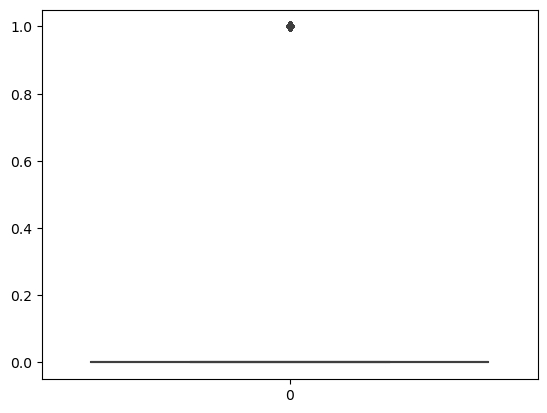

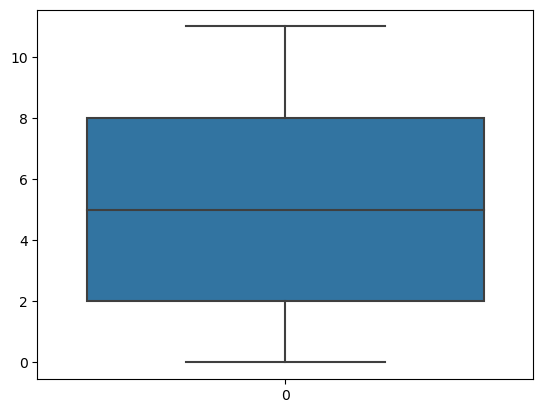

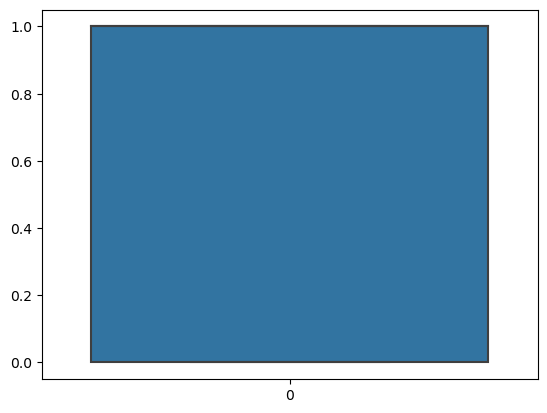

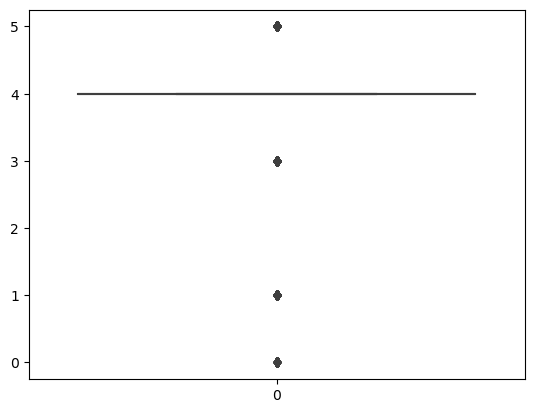

In [21]:
# Finding for outliers
for feature in feature_discrete_numerical:
    dataset=data.copy()
    sns.boxplot(data=dataset[feature])
    plt.show()

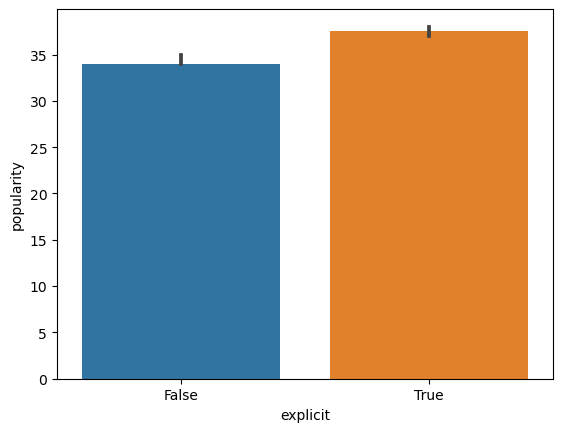

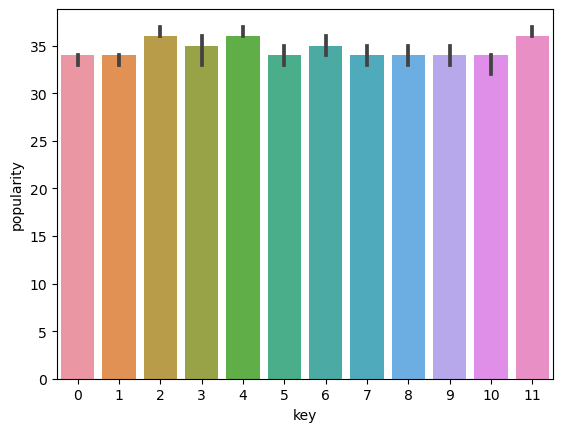

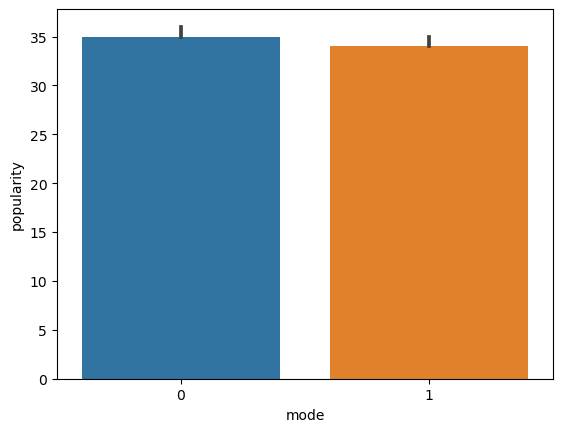

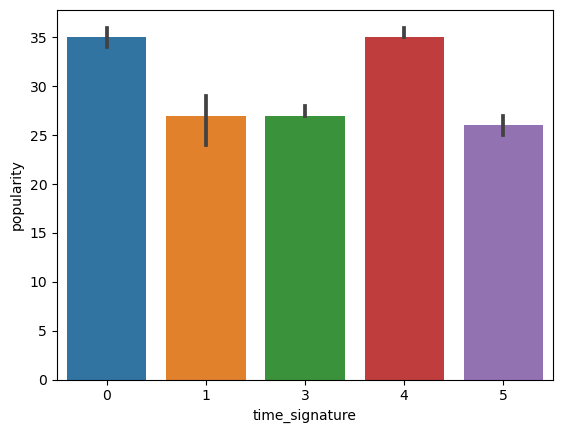

In [22]:
for feature in feature_discrete_numerical:
    dataset=data.copy()
    sns.barplot(x=feature, y=dataset['popularity'], data=dataset, estimator=np.median)
    plt.show()

Observation:
1. We see that songs which contain explicit lyrics are more popular in comparision with sons that do not contain such lyrics.
2. The popularity of songs or tracks in different keys do not affect theirpopularity much. Songs in all the keys are almost equally popular.
3. The tracks in both the modes are equally popular, the major as well as the minor.
4. The time signature (meter) is a notational convention to specify how many beats are in each bar. The time_signature should lie between 3 to 7 as per the data dictionary time signatures of 3/4, to 7/4. But here time_signature ranges from 0 to 5. We would probably convert these in Feature Selection. From the current looks, tracks having time_signature 0 and 4 are more popular than other.

##### Selecting the continuous features among the numerical features and finding their distribution

In [23]:
features_continuous_numerical=[features for features in feature_numerical if features not in feature_discrete_numerical]

In [24]:
features_continuous_numerical

['popularity',
 'duration_ms',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

In [25]:
from scipy.stats import skew

popularity skewness is : 0.04222809948109981


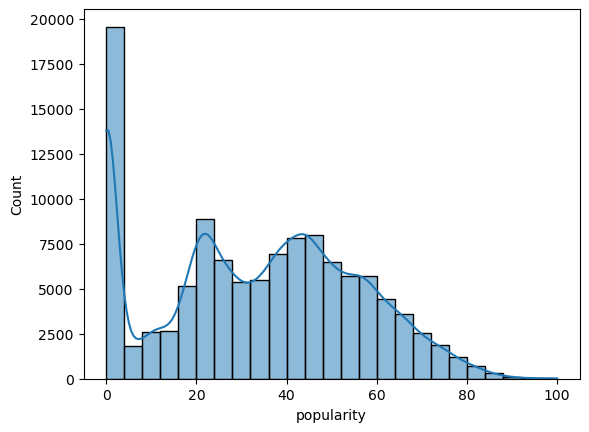

duration_ms skewness is : 10.814434004933338


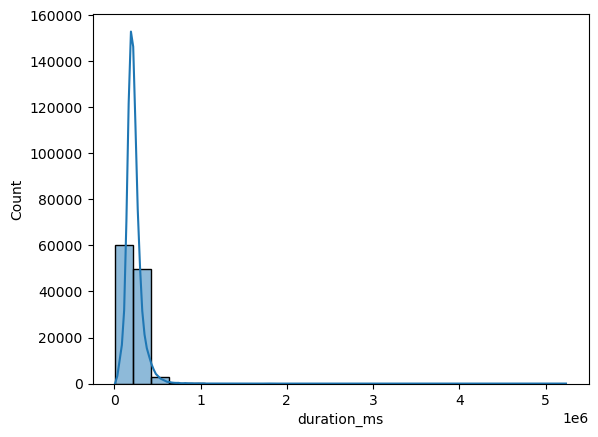

danceability skewness is : -0.4003991295600715


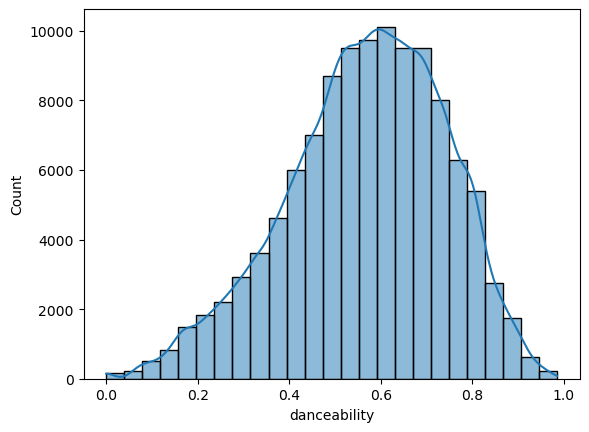

energy skewness is : -0.598542182428158


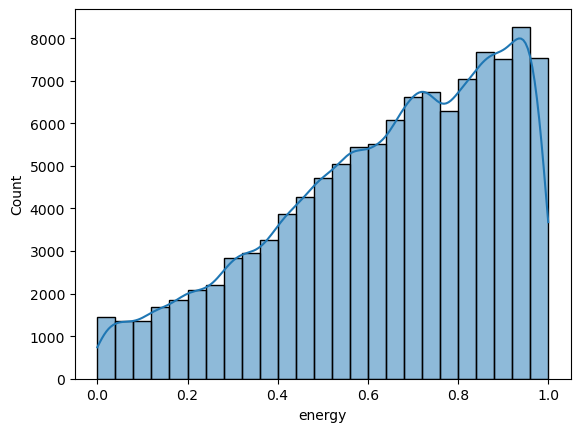

loudness skewness is : -2.0133133823721505


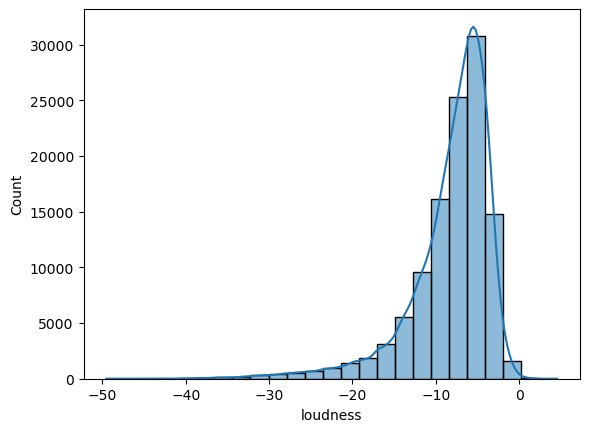

speechiness skewness is : 4.644508700286168


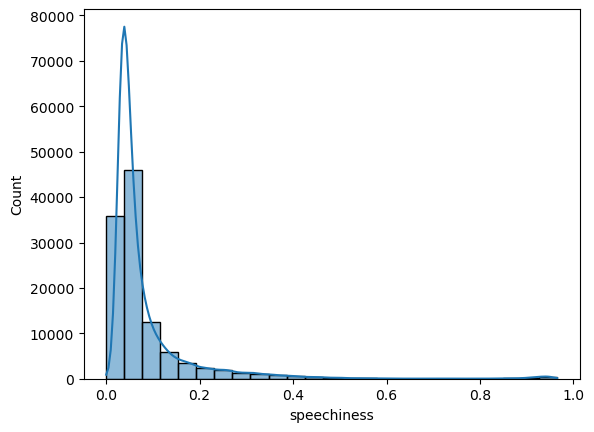

acousticness skewness is : 0.7302103030827026


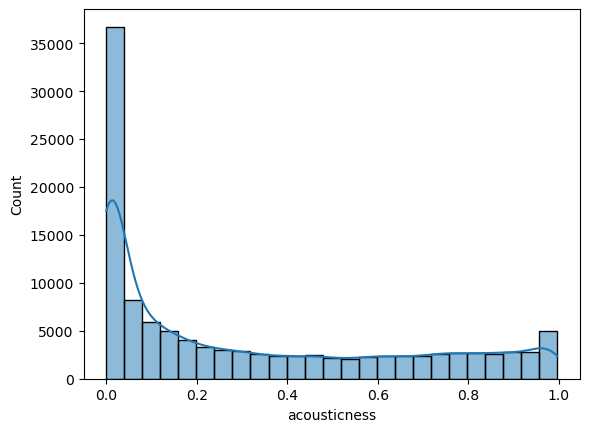

instrumentalness skewness is : 1.7377466866935405


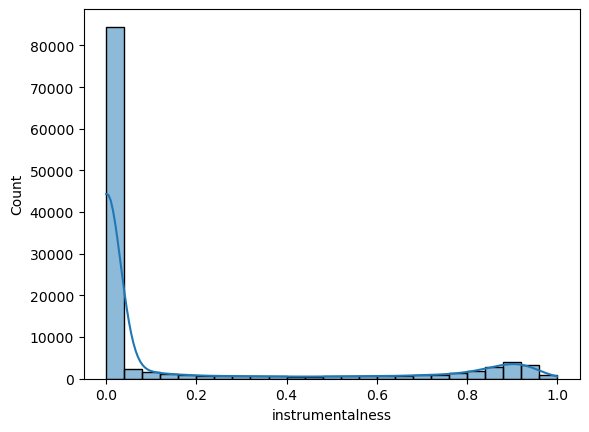

liveness skewness is : 2.1054497237799685


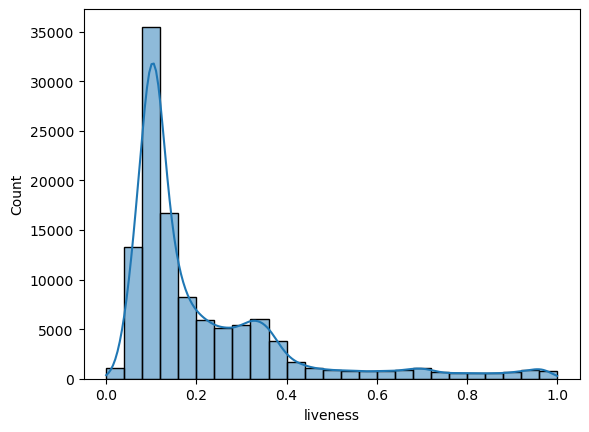

valence skewness is : 0.11477275798096229


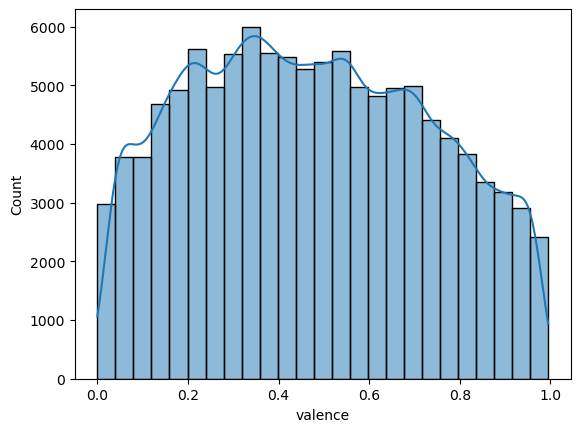

tempo skewness is : 0.23160111991386964


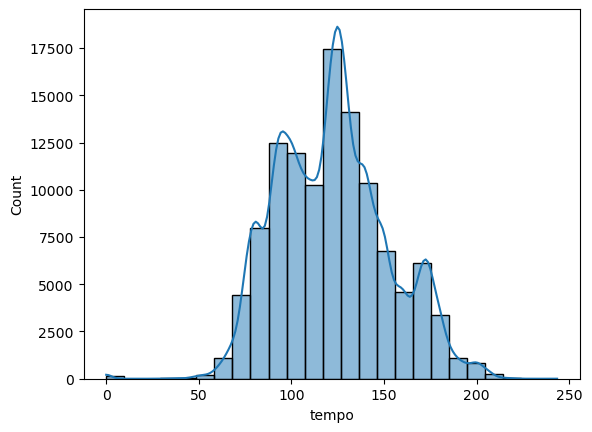

In [26]:
for feature in features_continuous_numerical:
    dataset=data.copy()
    print(feature, 'skewness is :', skew(dataset[feature]))
    sns.histplot(x=feature, data=dataset, bins=25, kde=True)
    plt.show()

Observation:
1. We see that danceability, valence and tempo are almost normal distribution.
2. Loudness is left skewed.
3. Rest all are right skewed.

Now to remove the skewness, we can perform operations like log transformation, square-root transformation etc. But before applying any of the methods, lets check the correlation of the continuous features with the target.

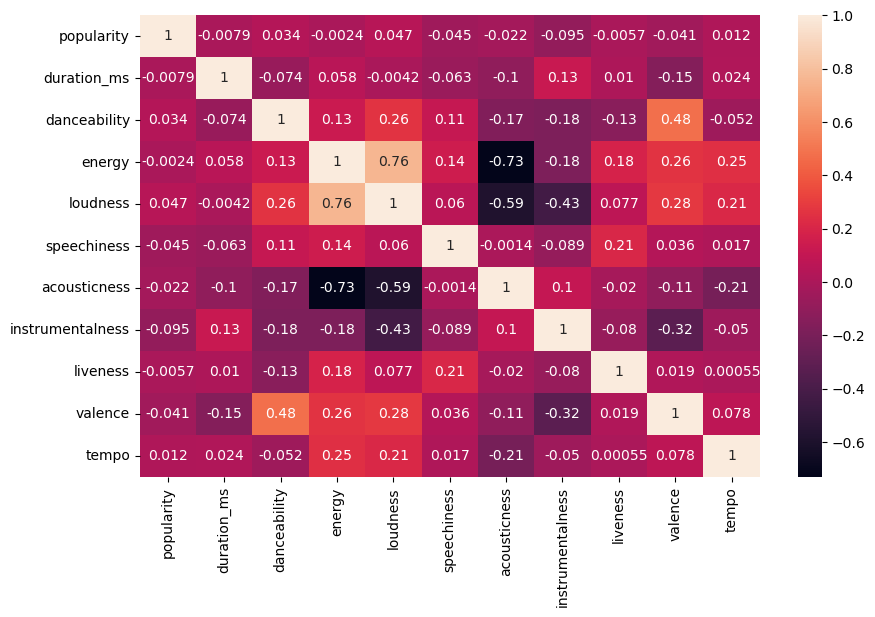

In [27]:
dataset=data.copy()
plt.figure(figsize=(10,6))
sns.heatmap(data[features_continuous_numerical].corr(), annot=True)
plt.show()

We see that none of the continuous features has a great correlation with the target variable popularity. So we can perform the transformations if we opt for regresion model. The other models like SVM, Tree based methods, XG boost do not require such transformations. We would deal with the transformations in feature engineering.

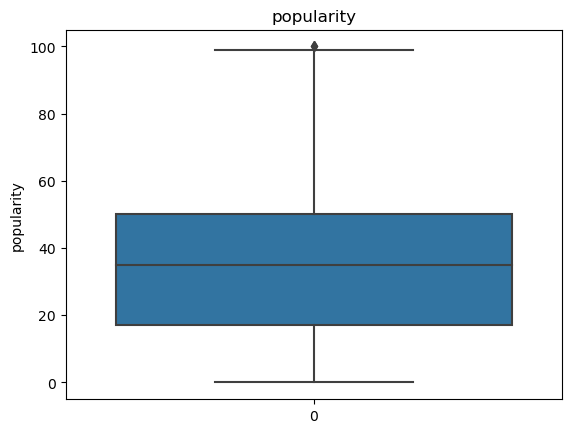

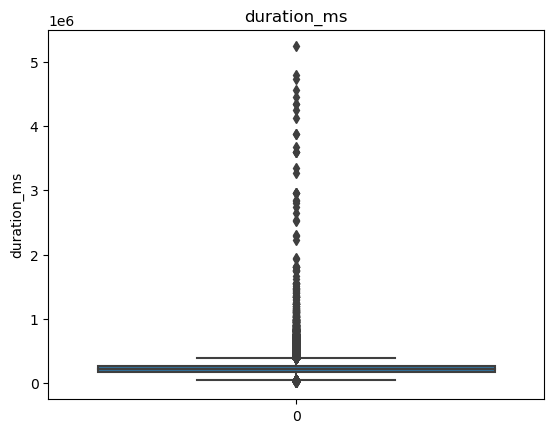

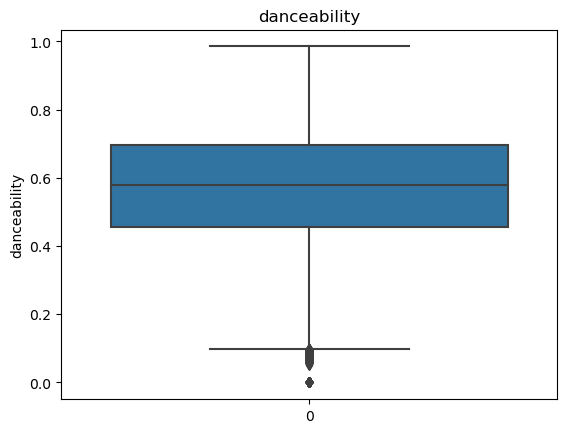

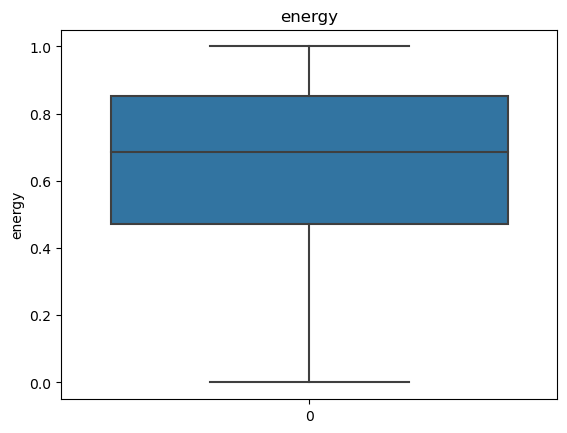

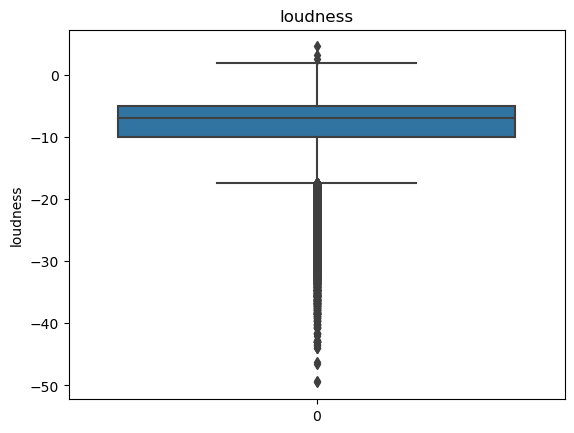

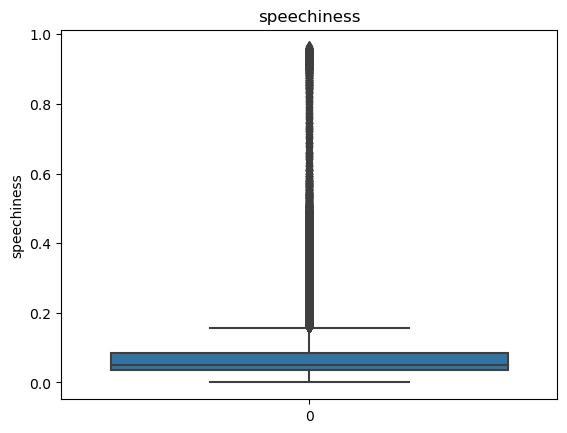

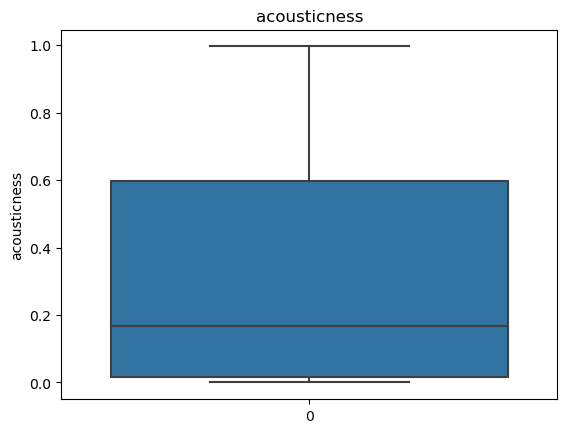

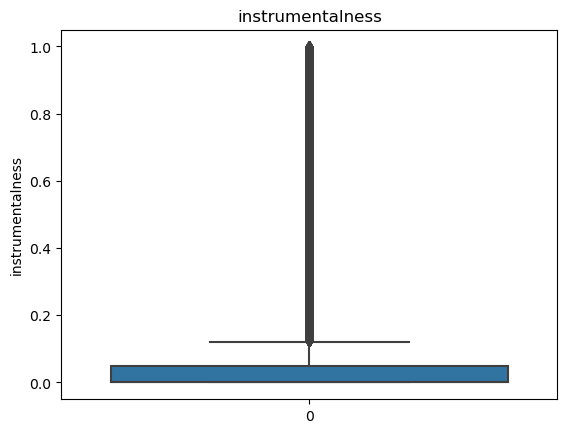

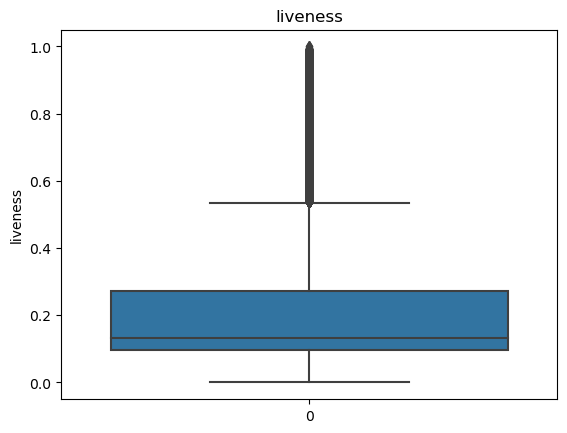

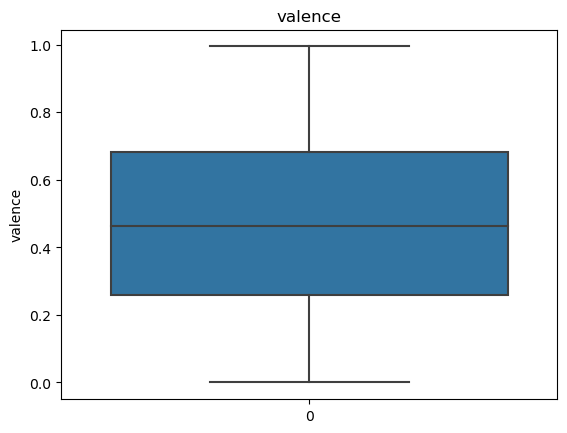

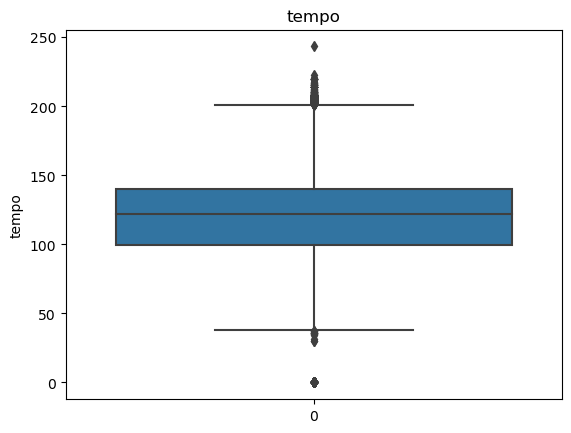

In [28]:
# checking the outliers
for feature in features_continuous_numerical:
    dataset=data.copy()
    sns.boxplot(data=dataset[feature])
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

We see that apart from energy, acousticness and valence, there are a lot of outliers in most of the features.

##### Categorical variables

In [29]:
feature_categorical=[feature for feature in data.columns if data[feature].dtypes=='O']
print('Number of categorical features:', len(feature_categorical))
data[feature_categorical].head()

Number of categorical features: 5


,track_id,artists,album_name,track_name,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,acoustic


In [30]:
feature_categorical

['track_id', 'artists', 'album_name', 'track_name', 'track_genre']

Among the categorical features, track_id would be unique for each entry. Later we can drop this column. Lets check the cardinality of the categorical features to know the number of unique variables.

In [31]:
for feature in feature_categorical:
    dataset=data.copy()
    print(feature, ': Number of unique entries:', dataset[feature].nunique())

track_id : Number of unique entries: 89740
artists : Number of unique entries: 31437
album_name : Number of unique entries: 46589
track_name : Number of unique entries: 73608
track_genre : Number of unique entries: 114


Observation: There are a lot of unique entries in each of the categorical features.

Most of the categorical features are names like track name, album name, artist name, etc. track_id is unique for every song/track. We can later drop this. track_genre can have effect in popularity.

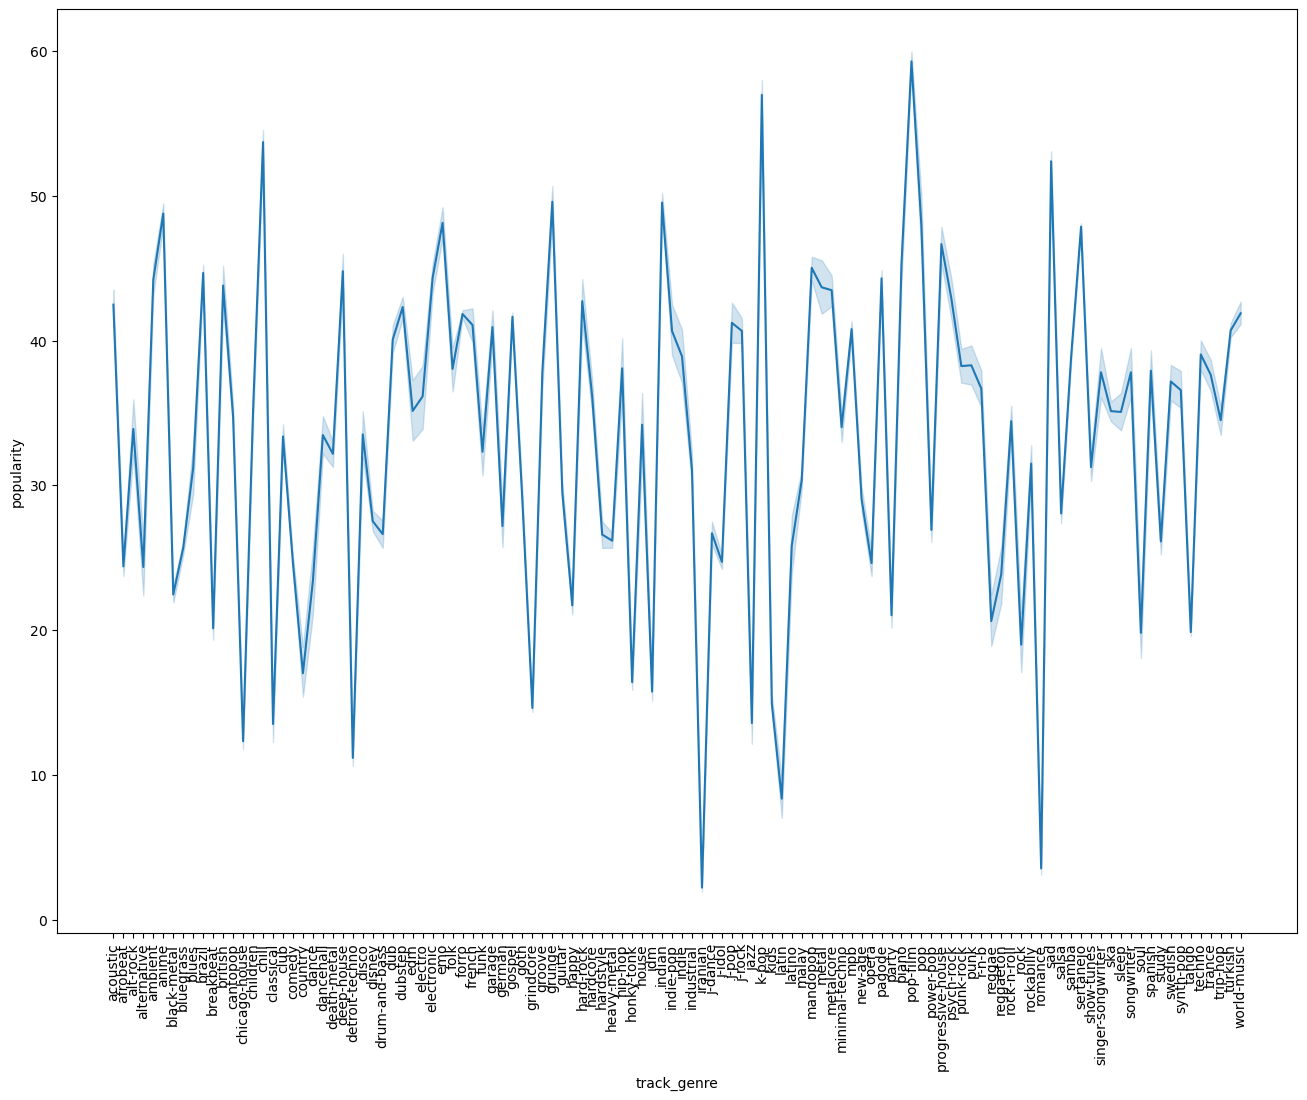

In [32]:
dataset=data.copy()
plt.figure(figsize=(16,12))
sns.lineplot(x='track_genre', y='popularity', data=dataset)
plt.xticks(rotation=90)
plt.show()